## Line plots of all mooring data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import xarray as xr

### Open datasets with raw observations

In [2]:
# open Sverdrup 2019 dataset
file_dir = Path('H:/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
sverdrup_ds = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_Sverdrup_1D_L3_2018-2019.nc")
sverdrup_ds.close()

In [4]:
# open Rink 2019 dataset
file_dir = Path('H:/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
rink_ds = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_RinkFisher_1D_L3_2018-2019.nc")
rink_ds.close()

In [5]:
# open Fisher Islands 2020 dataset
file_dir = Path('H:/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2020')
fisher_ds = xr.open_dataset(file_dir / 'OMG_Narwhals_Mooring_RinkFisher_1D_L3_2019-2020.nc')
fisher_ds.close()

In [6]:
# open Kong Oscar 2019 dataset
file_dir = Path('H:/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2019')
kongoscar19_ds = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_KongOscar_1D_L3_2018-2019.nc")
kongoscar19_ds.close()

In [7]:
# open Kong Oscar 2020 dataset
file_dir = Path('H:/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_L3/2020')
kongoscar20_ds = xr.open_dataset(file_dir / 'OMG_Narwhals_Mooring_KongOscar_1D_L3_2019-2020.nc')
kongoscar20_ds.close()

### Open DataArrays with interpolated temperature and salinity profiles

In [10]:
file_dir = Path('H:/PhD_chap3/data/OMG_Narwhals_mooring_data/OMG_Narwhals_mooring_interpolated/')

In [11]:
# open Rink data
rink_temp_da_interp = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_Rink_1D_interpolated_temp_profile.nc")
rink_temp_da_interp.close()
rink_salt_da_interp = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_Rink_1D_interpolated_salt_profile.nc")
rink_salt_da_interp.close()

In [12]:
# open Fisher Islands data
fisher_temp_da_interp = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_Fisher_1D_interpolated_temp_profile.nc")
fisher_temp_da_interp.close()
fisher_salt_da_interp = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_Fisher_1D_interpolated_salt_profile.nc")
fisher_salt_da_interp.close()

In [13]:
# open Kong Oscar data
kongoscar_temp_da_interp = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_KongOscar_1D_interpolated_temp_profile.nc")
kongoscar_temp_da_interp.close()
kongoscar_salt_da_interp = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_KongOscar_1D_interpolated_salt_profile.nc")
kongoscar_salt_da_interp.close()

In [14]:
# open Sverdrup data
sverdrup_temp_da_interp = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_Sverdrup_1D_interpolated_temp_profile.nc")
sverdrup_temp_da_interp.close()
sverdrup_salt_da_interp = xr.open_dataset(file_dir / "OMG_Narwhals_Mooring_Sverdrup_1D_interpolated_salt_profile.nc")
sverdrup_salt_da_interp.close()

***

In [18]:
# 120-140 m

# temperature
rink_temp_120m_timeseries_da     = rink_temp_da_interp.temperature.sel(depth=slice(120,140)).mean(dim='depth', skipna=True)
fisher_temp_120m_timeseries_da   = fisher_temp_da_interp.temperature.sel(depth=slice(120,140)).mean(dim='depth', skipna=True)
sverdrup_temp_120m_timeseries_da = sverdrup_temp_da_interp.temperature.sel(depth=slice(120,140)).mean(dim='depth', skipna=True)
KO_temp_120m_timeseries_da       = kongoscar_temp_da_interp.temperature.sel(depth=slice(120,140)).mean(dim='depth', skipna=True)

# salinity
rink_salt_120m_timeseries_da     = rink_salt_da_interp.salinity.sel(depth=slice(120,140)).mean(dim='depth', skipna=True)
fisher_salt_120m_timeseries_da   = fisher_salt_da_interp.salinity.sel(depth=slice(120,140)).mean(dim='depth', skipna=True)
sverdrup_salt_120m_timeseries_da = sverdrup_salt_da_interp.salinity.sel(depth=slice(120,140)).mean(dim='depth', skipna=True)
KO_salt_120m_timeseries_da       = kongoscar_salt_da_interp.salinity.sel(depth=slice(120,140)).mean(dim='depth', skipna=True)

In [19]:
# 220-240 m

# temperature
rink_temp_220m_timeseries_da     = rink_temp_da_interp.temperature.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
fisher_temp_220m_timeseries_da   = fisher_temp_da_interp.temperature.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
sverdrup_temp_220m_timeseries_da = sverdrup_temp_da_interp.temperature.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
KO_temp_220m_timeseries_da       = kongoscar_temp_da_interp.temperature.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)

# salinity
rink_salt_220m_timeseries_da     = rink_salt_da_interp.salinity.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
fisher_salt_220m_timeseries_da   = fisher_salt_da_interp.salinity.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
sverdrup_salt_220m_timeseries_da = sverdrup_salt_da_interp.salinity.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)
KO_salt_220m_timeseries_da       = kongoscar_salt_da_interp.salinity.sel(depth=slice(220,240)).mean(dim='depth', skipna=True)

In [18]:
kongoscar_temp_da_interp.sel(time='2019-08-04')

<xarray.Dataset>
Dimensions:      (time: 2, depth: 100)
Coordinates:
  * time         (time) datetime64[ns] 2019-08-04 2019-08-04
  * depth        (depth) float64 94.0 95.65 97.3 98.95 ... 254.2 255.8 257.5
    SN_temp      (depth) object ...
Data variables:
    temperature  (depth, time) float64 ...

### Export mean temp and salinity estimates to csv for narwhal habitat model

Temperature

In [ ]:
rink_temp_120m_df_1D   
fisher_temp_120m_df_1D 
ko_temp_120m_df_1D     
sver_temp_120m_df_1D   

,time,temperature
0,2018-08-28,-0.592766
1,2018-08-29,-0.554235
2,2018-08-30,-0.525798
3,2018-08-31,-0.582821
4,2018-09-01,-0.648713
...,...,...
337,2019-07-31,NaN
338,2019-08-01,NaN
339,2019-08-02,NaN
340,2019-08-03,NaN


In [20]:
rink_temp_120m_df_1D   = pd.DataFrame({'time': rink_temp_120m_timeseries_da.time.values, 'temperature': rink_temp_120m_timeseries_da})
fisher_temp_120m_df_1D = pd.DataFrame({'time': fisher_temp_120m_timeseries_da.time.values, 'temperature': fisher_temp_120m_timeseries_da})
ko_temp_120m_df_1D     = pd.DataFrame({'time': KO_temp_120m_timeseries_da.time.values, 'temperature': KO_temp_120m_timeseries_da})
sver_temp_120m_df_1D   = pd.DataFrame({'time': sverdrup_temp_120m_timeseries_da.time.values, 'temperature': sverdrup_temp_120m_timeseries_da})

In [ ]:
rink_temp_120m_df_1D.to_csv('D:/Habitat_model_data/temperature/rink_temp_120m_1D.csv', index=False)
fisher_temp_120m_df_1D.to_csv('D:/Habitat_model_data/temperature/fisher_temp_120m_1D.csv', index=False)
ko_temp_120m_df_1D.to_csv('D:/Habitat_model_data/temperature/kongoscar_temp_120m_1D.csv', index=False)
sver_temp_120m_df_1D.to_csv('D:/Habitat_model_data/temperature/sverdrup_temp_120m_1D.csv', index=False)

In [21]:
rink_temp_220m_df_1D   = pd.DataFrame({'time': rink_temp_220m_timeseries_da.time.values, 'temperature': rink_temp_220m_timeseries_da})
fisher_temp_220m_df_1D = pd.DataFrame({'time': fisher_temp_220m_timeseries_da.time.values, 'temperature': fisher_temp_220m_timeseries_da})
ko_temp_220m_df_1D     = pd.DataFrame({'time': KO_temp_220m_timeseries_da.time.values, 'temperature': KO_temp_220m_timeseries_da})
sver_temp_220m_df_1D   = pd.DataFrame({'time': sverdrup_temp_220m_timeseries_da.time.values, 'temperature': sverdrup_temp_220m_timeseries_da})

In [ ]:
rink_temp_220m_df_1D.to_csv('D:/Habitat_model_data/temperature/rink_temp_220m_1D.csv', index=False)
fisher_temp_220m_df_1D.to_csv('D:/Habitat_model_data/temperature/fisher_temp_220m_1D.csv', index=False)
ko_temp_220m_df_1D.to_csv('D:/Habitat_model_data/temperature/kongoscar_temp_220m_1D.csv', index=False)
sver_temp_220m_df_1D.to_csv('D:/Habitat_model_data/temperature/sverdrup_temp_220m_1D.csv', index=False)

Salinity

In [22]:
rink_salt_120m_df_1D   = pd.DataFrame({'time': rink_salt_120m_timeseries_da.time.values, 'salinity': rink_salt_120m_timeseries_da})
fisher_salt_120m_df_1D = pd.DataFrame({'time': fisher_salt_120m_timeseries_da.time.values, 'salinity': fisher_salt_120m_timeseries_da})
ko_salt_120m_df_1D     = pd.DataFrame({'time': KO_salt_120m_timeseries_da.time.values, 'salinity': KO_salt_120m_timeseries_da})
sver_salt_120m_df_1D   = pd.DataFrame({'time': sverdrup_salt_120m_timeseries_da.time.values, 'salinity': sverdrup_salt_120m_timeseries_da})

In [ ]:
rink_salt_120m_df_1D.to_csv('D:/Habitat_model_data/salinity/rink_salt_120m_1D.csv', index=False)
fisher_salt_120m_df_1D.to_csv('D:/Habitat_model_data/salinity/fisher_salt_120m_1D.csv', index=False)
ko_salt_120m_df_1D.to_csv('D:/Habitat_model_data/salinity/kongoscar_salt_120m_1D.csv', index=False)
sver_salt_120m_df_1D.to_csv('D:/Habitat_model_data/salinity/sverdrup_salt_120m_1D.csv', index=False)

In [23]:
rink_salt_220m_df_1D   = pd.DataFrame({'time': rink_salt_220m_timeseries_da.time.values, 'salinity': rink_salt_220m_timeseries_da})
fisher_salt_220m_df_1D = pd.DataFrame({'time': fisher_salt_220m_timeseries_da.time.values, 'salinity': fisher_salt_220m_timeseries_da})
ko_salt_220m_df_1D     = pd.DataFrame({'time': KO_salt_220m_timeseries_da.time.values, 'salinity': KO_salt_220m_timeseries_da})
sver_salt_220m_df_1D   = pd.DataFrame({'time': sverdrup_salt_220m_timeseries_da.time.values, 'salinity': sverdrup_salt_220m_timeseries_da})

In [ ]:
rink_salt_220m_df_1D.to_csv('D:/Habitat_model_data/salinity/rink_salt_220m_1D.csv', index=False)
fisher_salt_220m_df_1D.to_csv('D:/Habitat_model_data/salinity/fisher_salt_220m_1D.csv', index=False)
ko_salt_220m_df_1D.to_csv('D:/Habitat_model_data/salinity/kongoscar_salt_220m_1D.csv', index=False)
sver_salt_220m_df_1D.to_csv('D:/Habitat_model_data/salinity/sverdrup_salt_220m_1D.csv', index=False)

### Raw observations of temp and salinity from CTDs

In [26]:
rink_ds.salinity.Depth_CTD.values[0]

76

In [25]:
rink_ds.sel(Depth_temp=rink_ds.salinity.Depth_CTD.values).temperature

<xarray.DataArray 'temperature' (Depth_temp: 2, time: 342)>
array([[-1.189267, -1.230805, -1.223863, ..., -0.657597, -0.672024, -0.680244],
       [ 1.486194,  1.480013,  1.48861 , ...,  1.571284,  1.595378,  1.592704]])
Coordinates:
  * time        (time) datetime64[ns] 2018-08-28 2018-08-29 ... 2019-08-04
  * Depth_temp  (Depth_temp) int32 76 328
    SN_temp     (Depth_temp) object 'SBE37_03716788' 'SBE37_03716789'
Attributes:
    units:             C
    seabird_var_name:  tv290C
    comments:          ITS-90

In [33]:
rink_ds.salinity.Depth_CTD.values[0]

76

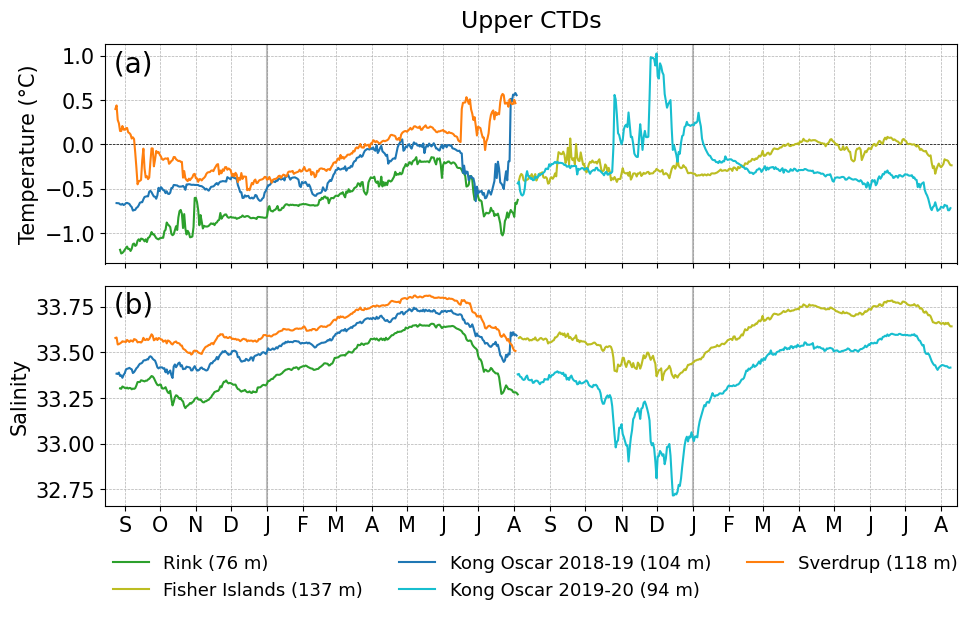

In [22]:
plt.rcParams['font.size'] = '15'
fig, (ax1,ax2) = plt.subplots(2,1, figsize=[11,6])
plt.subplots_adjust(wspace=0, hspace=0.1)

ax1.axhline(y=0, linewidth=0.5, c='k', linestyle='--') # add a horizontal line at 0 deg C

ax1.axvline(x=np.datetime64('2019-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-')
ax1.axvline(x=np.datetime64('2020-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-')
ax2.axvline(x=np.datetime64('2019-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-')
ax2.axvline(x=np.datetime64('2020-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-')

# plot temperature
rink_ds.sel(Depth_temp=rink_ds.salinity.Depth_CTD.values[0]).temperature.plot(ax=ax1, c='tab:green', label='Rink')
fisher_ds.sel(Depth_temp=fisher_ds.salinity.Depth_CTD.values[0]).temperature.plot(ax=ax1, c='tab:olive', label='Fisher Islands')
kongoscar19_ds.sel(Depth_temp=kongoscar19_ds.salinity.Depth_CTD.values[0]).temperature.plot(ax=ax1, c='tab:blue', label='Kong Oscar')
kongoscar20_ds.sel(Depth_temp=kongoscar20_ds.salinity.Depth_CTD.values[0]).temperature.plot(ax=ax1, c='tab:cyan')
sverdrup_ds.sel(Depth_temp=sverdrup_ds.salinity.Depth_CTD.values[0]).temperature.plot(ax=ax1, c='tab:orange', label='Sverdrup')

# plot salinity
rink_ds.sel(Depth_CTD=rink_ds.salinity.Depth_CTD.values[0]).salinity.plot(ax=ax2, c='tab:green', label='Rink'+' ('+ str(rink_ds.salinity.Depth_CTD.values[0]) +' m)')
fisher_ds.sel(Depth_CTD=fisher_ds.salinity.Depth_CTD.values[0]).salinity.plot(ax=ax2, c='tab:olive', label='Fisher Islands'+' ('+ str(fisher_ds.salinity.Depth_CTD.values[0]) +' m)')
kongoscar19_ds.sel(Depth_CTD=kongoscar19_ds.salinity.Depth_CTD.values[0]).salinity.plot(ax=ax2, c='tab:blue', label='Kong Oscar 2018-19'+' ('+ str(kongoscar19_ds.salinity.Depth_CTD.values[0]) +' m)')
kongoscar20_ds.sel(Depth_CTD=kongoscar20_ds.salinity.Depth_CTD.values[0]).salinity.plot(ax=ax2, c='tab:cyan', label='Kong Oscar 2019-20'+' ('+ str(kongoscar20_ds.salinity.Depth_CTD.values[0]) +' m)')
sverdrup_ds.sel(Depth_CTD=sverdrup_ds.salinity.Depth_CTD.values[0]).salinity.plot(ax=ax2, c='tab:orange', label='Sverdrup'+' ('+ str(sverdrup_ds.salinity.Depth_CTD.values[0]) +' m)')

months = pd.period_range(np.datetime64('2018-09'), freq='M', periods=26).strftime('%Y-%m').tolist()
abbreviations = ["S","O",'N','D',"J",'F','M','A','M','J','J','A','S','O','N','D',"J",'F','M','A','M','J','J','A','S','O']

ax1.set_title('Upper CTDs',loc='center',y=1.2, pad=5,fontsize = 17)
ax1.set_title(" (a)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax1.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax1.set_ylabel("Temperature (°C)")
ax1.set_xlabel("")
ax1.xaxis.set_ticklabels([])
ax1.grid(linestyle='--', linewidth=0.5)
# ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-10-05'))
ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'))

ax2.set_title("")
ax2.set_title(" (b)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax2.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax2.set_ylabel("Salinity")
# ax2.set_xlabel("Month")
ax2.set_xlabel("")
ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'));

# ax2.legend(ncol=3,prop={'size': 13},loc='upper left');
ax2.legend(ncol=3,prop={'size': 13},bbox_to_anchor=(-0.01, -0.15), loc='upper left',frameon=False);

plt.savefig("figures/mooring_upperCTDs-temp-salt.png", bbox_inches='tight', dpi=300, facecolor='white');

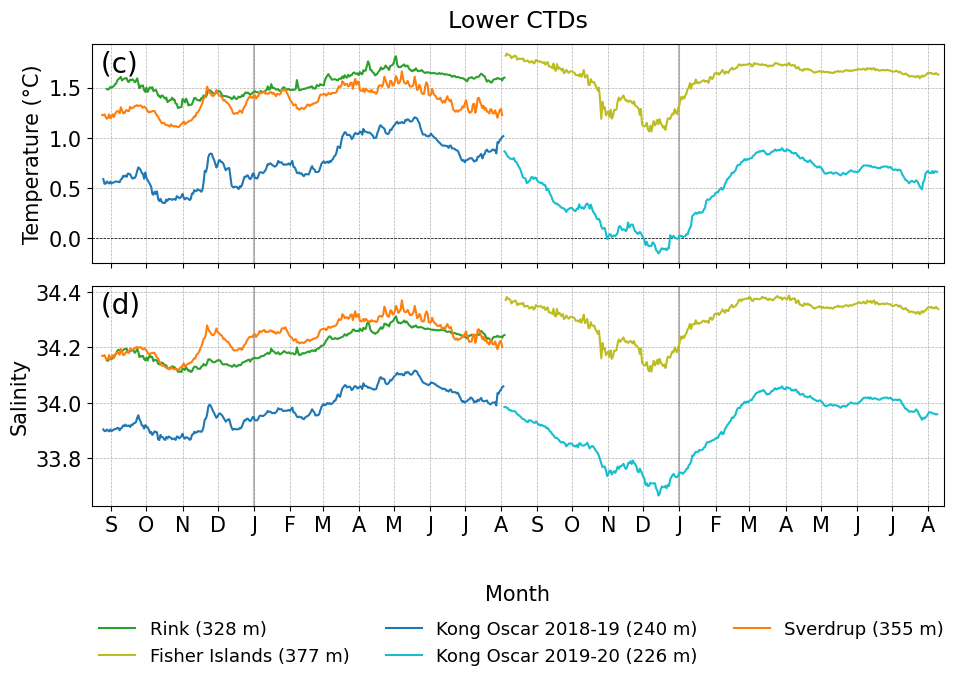

In [23]:
plt.rcParams['font.size'] = '15'
fig, (ax1,ax2) = plt.subplots(2,1, figsize=[11,6])
plt.subplots_adjust(wspace=0, hspace=0.1)

ax1.axhline(y=0, linewidth=0.5, c='k', linestyle='--') # add a horizontal line at 0 deg C
ax1.axvline(x=np.datetime64('2019-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-')
ax1.axvline(x=np.datetime64('2020-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-')
ax2.axvline(x=np.datetime64('2019-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-')
ax2.axvline(x=np.datetime64('2020-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-')

# plot temperature
rink_ds.sel(Depth_temp=rink_ds.salinity.Depth_CTD.values[1]).temperature.plot(ax=ax1, c='tab:green', label='Rink')
fisher_ds.sel(Depth_temp=fisher_ds.salinity.Depth_CTD.values[1]).temperature.plot(ax=ax1, c='tab:olive', label='Fisher Islands')
kongoscar19_ds.sel(Depth_temp=kongoscar19_ds.salinity.Depth_CTD.values[1]).temperature.plot(ax=ax1, c='tab:blue', label='Kong Oscar')
kongoscar20_ds.sel(Depth_temp=kongoscar20_ds.salinity.Depth_CTD.values[1]).temperature.plot(ax=ax1, c='tab:cyan')
sverdrup_ds.sel(Depth_temp=sverdrup_ds.salinity.Depth_CTD.values[1]).temperature.plot(ax=ax1, c='tab:orange', label='Sverdrup')

# plot salinity
rink_ds.sel(Depth_CTD=rink_ds.salinity.Depth_CTD.values[1]).salinity.plot(ax=ax2, c='tab:green', label='Rink'+' ('+ str(rink_ds.salinity.Depth_CTD.values[1]) +' m)')
fisher_ds.sel(Depth_CTD=fisher_ds.salinity.Depth_CTD.values[1]).salinity.plot(ax=ax2, c='tab:olive', label='Fisher Islands'+' ('+ str(fisher_ds.salinity.Depth_CTD.values[1]) +' m)')
kongoscar19_ds.sel(Depth_CTD=kongoscar19_ds.salinity.Depth_CTD.values[1]).salinity.plot(ax=ax2, c='tab:blue', label='Kong Oscar 2018-19'+' ('+ str(kongoscar19_ds.salinity.Depth_CTD.values[1]) +' m)')
kongoscar20_ds.sel(Depth_CTD=kongoscar20_ds.salinity.Depth_CTD.values[1]).salinity.plot(ax=ax2, c='tab:cyan', label='Kong Oscar 2019-20'+' ('+ str(kongoscar20_ds.salinity.Depth_CTD.values[1]) +' m)')
sverdrup_ds.sel(Depth_CTD=sverdrup_ds.salinity.Depth_CTD.values[1]).salinity.plot(ax=ax2, c='tab:orange', label='Sverdrup'+' ('+ str(sverdrup_ds.salinity.Depth_CTD.values[1]) +' m)')

months = pd.period_range(np.datetime64('2018-09'), freq='M', periods=26).strftime('%Y-%m').tolist()
abbreviations = ["S","O",'N','D',"J",'F','M','A','M','J','J','A','S','O','N','D',"J",'F','M','A','M','J','J','A','S','O']

ax1.set_title('Lower CTDs',loc='center',y=1.2, pad=5,fontsize = 17)
ax1.set_title(" (c)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax1.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax1.set_ylabel("Temperature (°C)")
ax1.set_xlabel("")
ax1.xaxis.set_ticklabels([])
ax1.grid(linestyle='--', linewidth=0.5)
# ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-10-05'))
ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'))

ax2.set_title("")
ax2.set_title(" (d)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax2.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax2.set_ylabel("Salinity")
ax2.set_xlabel("Month", labelpad=35)
ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'))
ax2.legend(ncol=3,prop={'size': 13},bbox_to_anchor=(-0.01, -0.45), loc='upper left',frameon=False);

plt.savefig("figures/mooring_lowerCTDs-temp-salt.png", bbox_inches='tight', dpi=300, facecolor='white');

### Anomaly plots

In [24]:
mooring_temp_120m = np.concatenate((rink_temp_120m_timeseries_da.values, 
                                    fisher_temp_120m_timeseries_da.values,
                                    sverdrup_temp_120m_timeseries_da.values,
                                    KO_temp_120m_timeseries_da.values))
mooring_temp_120m_mean = np.nanmean(mooring_temp_120m)

In [15]:
mooring_temp_120m_mean

-0.06608990029001878

In [25]:
mooring_salt_120m = np.concatenate((rink_salt_120m_timeseries_da.values, 
                                    fisher_salt_120m_timeseries_da.values,
                                    sverdrup_salt_120m_timeseries_da.values,
                                    KO_salt_120m_timeseries_da.values))
mooring_salt_120m_mean = np.nanmean(mooring_salt_120m)

In [30]:
mooring_salt_120m_mean

33.6019912132531

In [26]:
mooring_temp_220m = np.concatenate((rink_temp_220m_timeseries_da.values, 
                                    fisher_temp_220m_timeseries_da.values,
                                    sverdrup_temp_220m_timeseries_da.values,
                                    KO_temp_220m_timeseries_da.values))
mooring_temp_220m_mean = np.nanmean(mooring_temp_220m)

In [27]:
mooring_temp_220m_mean

0.6378166471809986

In [28]:
mooring_salt_220m = np.concatenate((rink_salt_220m_timeseries_da.values, 
                                    fisher_salt_220m_timeseries_da.values,
                                    sverdrup_salt_220m_timeseries_da.values,
                                    KO_salt_220m_timeseries_da.values))
mooring_salt_220m_mean = np.nanmean(mooring_salt_220m)

In [29]:
mooring_salt_220m_mean

33.910490562208615

### Mean temp and salinity line plot

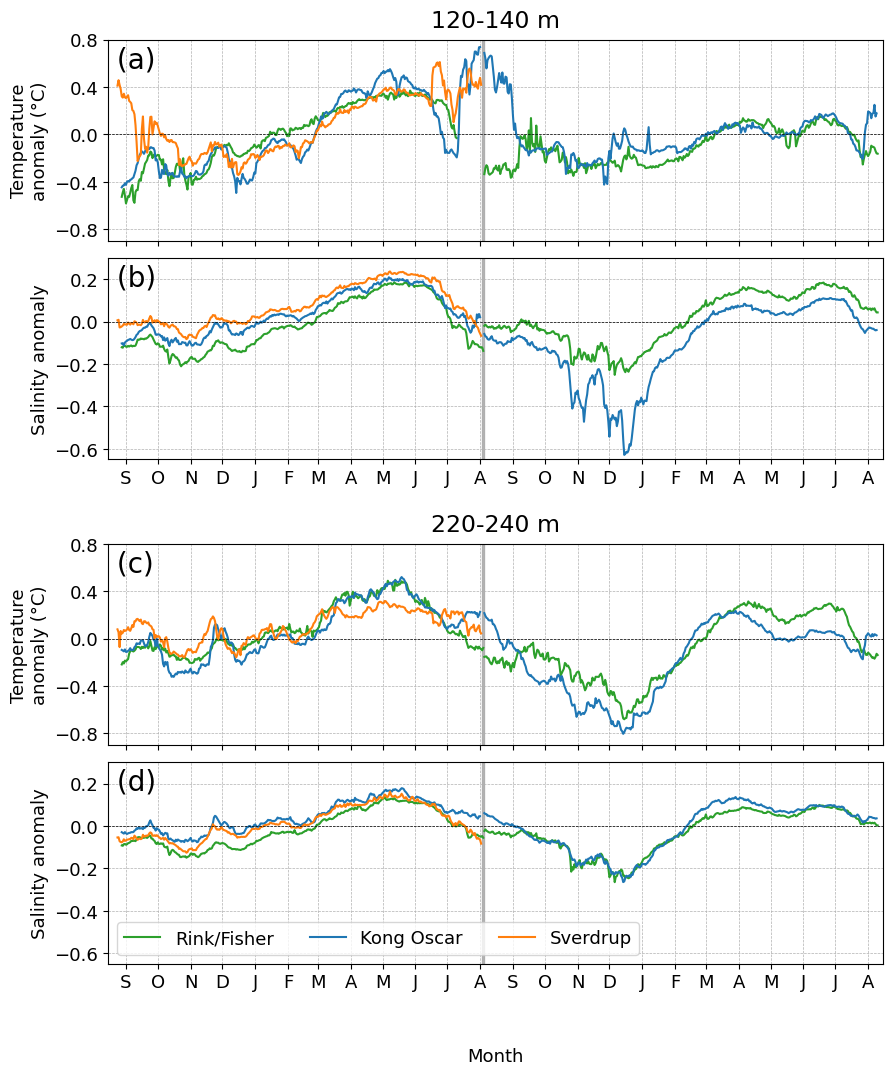

In [41]:
plt.rcParams['font.size'] = '13'
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, figsize=[10,12], gridspec_kw={'height_ratios': [1,1,0.25,1,1]})

#### 120-140 m =======================================

# plot temperature
(fisher_temp_120m_timeseries_da - mooring_temp_120m_mean).plot(ax=ax1, c='tab:green', label='Rink/Fisher')
(rink_temp_120m_timeseries_da - mooring_temp_120m_mean).plot(ax=ax1, c='tab:green')
(KO_temp_120m_timeseries_da - mooring_temp_120m_mean).plot(ax=ax1, c='tab:blue', label='Kong Oscar')
(sverdrup_temp_120m_timeseries_da - mooring_temp_120m_mean).plot(ax=ax1, c='tab:orange', label='Sverdrup')

# plot salinity
(fisher_salt_120m_timeseries_da - mooring_salt_120m_mean).plot(ax=ax2, c='tab:green', label='Rink/Fisher')
(rink_salt_120m_timeseries_da - mooring_salt_120m_mean).plot(ax=ax2, c='tab:green')
(KO_salt_120m_timeseries_da - mooring_salt_120m_mean).plot(ax=ax2, c='tab:blue', label='Kong Oscar')
(sverdrup_salt_120m_timeseries_da - mooring_salt_120m_mean).plot(ax=ax2, c='tab:orange', label='Sverdrup')

months = pd.period_range(np.datetime64('2018-09'), freq='M', periods=26).strftime('%Y-%m').tolist()
# abbreviations = ["S'18","O",'N','D',"J'19",'F','M','A','M','J','J','A','S','O','N','D',"J'20",'F','M','A','M','J','J','A','S','O']
abbreviations = ["S","O",'N','D',"J",'F','M','A','M','J','J','A','S','O','N','D',"J",'F','M','A','M','J','J','A','S','O']

ax1.set_title('120-140 m',loc='center',y=1.2,fontsize = 17)
ax1.set_title(" (a)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax1.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax1.set_ylabel("Temperature\nanomaly (°C)")
ax1.set_xlabel("")
ax1.xaxis.set_ticklabels([])
ax1.grid(linestyle='--', linewidth=0.5)
# ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-10-05'))
ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'))

ax2.set_title("")
ax2.set_title(" (b)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax2.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax2.set_ylabel("Salinity anomaly")
# ax2.set_xlabel("Month")
ax2.set_xlabel("")
ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'))
# ax2.legend(ncol=2,prop={'size': 13})

ax3.axis('off') # filler axis

#### 220-240 m =======================================
# plot temperature
(fisher_temp_220m_timeseries_da - mooring_temp_220m_mean).plot(ax=ax4, c='tab:green')
(rink_temp_220m_timeseries_da - mooring_temp_220m_mean).plot(ax=ax4, c='tab:green', label='Rink/Fisher')
(KO_temp_220m_timeseries_da - mooring_temp_220m_mean).plot(ax=ax4, c='tab:blue', label='Kong Oscar')
(sverdrup_temp_220m_timeseries_da - mooring_temp_220m_mean).plot(ax=ax4, c='tab:orange', label='Sverdrup')

# plot salinity
(fisher_salt_220m_timeseries_da - mooring_salt_220m_mean).plot(ax=ax5, c='tab:green')
(rink_salt_220m_timeseries_da - mooring_salt_220m_mean).plot(ax=ax5, c='tab:green', label='Rink/Fisher')
(KO_salt_220m_timeseries_da - mooring_salt_220m_mean).plot(ax=ax5, c='tab:blue', label='Kong Oscar')
(sverdrup_salt_220m_timeseries_da - mooring_salt_220m_mean).plot(ax=ax5, c='tab:orange', label='Sverdrup')

ax4.set_title('220-240 m',loc='center',y=1.2,fontsize = 17)
ax4.set_title(" (c)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax4.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax4.set_ylabel("Temperature\nanomaly (°C)")
ax4.set_xlabel("")
ax4.xaxis.set_ticklabels([])
ax4.grid(linestyle='--', linewidth=0.5)
# ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-10-05'))
ax4.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'))

ax5.set_title("")
ax5.set_title(" (d)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax5.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax5.set_ylabel("Salinity anomaly")
ax5.set_xlabel("Month", labelpad=40)
ax5.grid(linestyle='--', linewidth=0.5)
ax5.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'))
ax5.legend(ncol=3,prop={'size': 13},loc='lower left')

plt.subplots_adjust(wspace=0, hspace=0.1)

ax1.set_yticks([-0.8,-0.4,0,0.4,0.8])
ax4.set_yticks([-0.8,-0.4,0,0.4,0.8])

ax1.set_ylim(-0.9,0.8)
ax2.set_ylim(-0.65,0.3)
ax4.set_ylim(-0.9,0.8)
ax5.set_ylim(-0.65,0.3)

## add vertical lines for when the moorings were recovered and redployed
## add horizontal lines for 0
ax1.axhline(y=0, linewidth=0.5, c='k', linestyle='--') # add a horizontal line at 0 deg C
ax2.axhline(y=0, linewidth=0.5, c='k', linestyle='--') # add a horizontal line at 0 psu
ax4.axhline(y=0, linewidth=0.5, c='k', linestyle='--') # add a horizontal line at 0 deg C
ax5.axhline(y=0, linewidth=0.5, c='k', linestyle='--') # add a horizontal line at 0 psu

ax1.axvspan(np.datetime64('2019-08-03'), np.datetime64('2019-08-05'), alpha=0.5, color='gray')
ax2.axvspan(np.datetime64('2019-08-03'), np.datetime64('2019-08-05'), alpha=0.5, color='gray')
ax4.axvspan(np.datetime64('2019-08-03'), np.datetime64('2019-08-05'), alpha=0.5, color='gray')
ax5.axvspan(np.datetime64('2019-08-03'), np.datetime64('2019-08-05'), alpha=0.5, color='gray')

plt.savefig("figures/mooring_mean-temp-salt_anomaly.png", bbox_inches='tight', dpi=300, facecolor='white');

#### For powerpoint presentation:

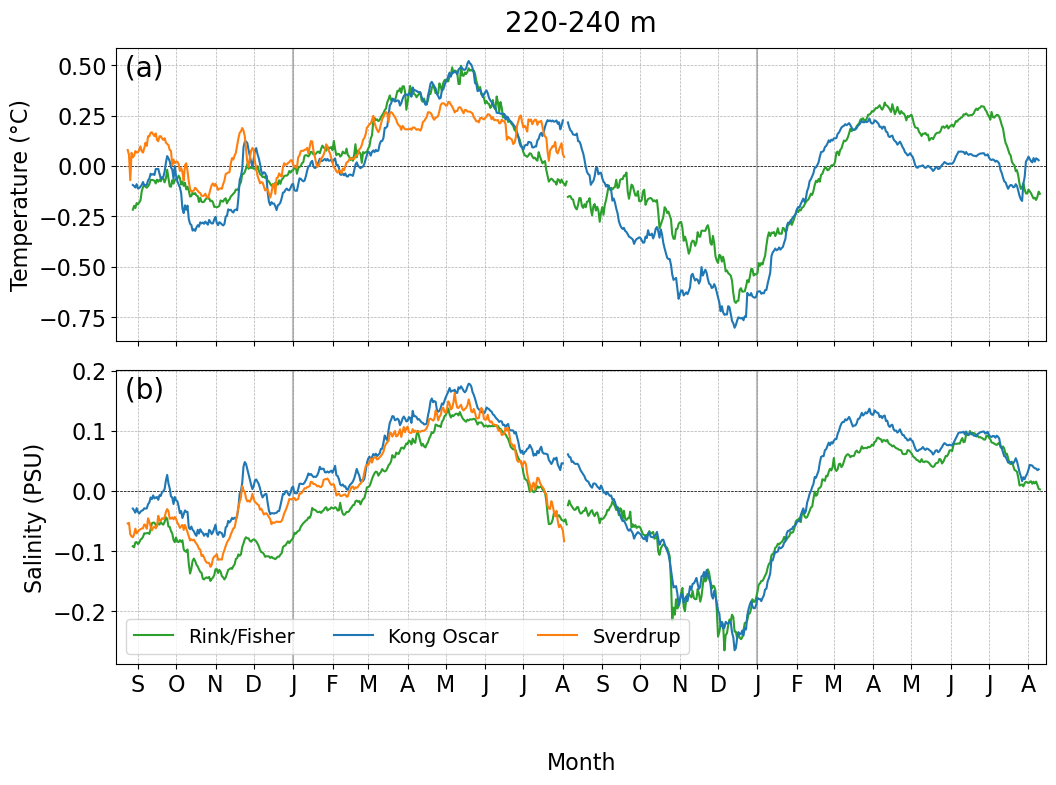

In [24]:
plt.rcParams['font.size'] = '16'
fig, (ax1,ax2) = plt.subplots(2,1, figsize=[12,8])

months = pd.period_range(np.datetime64('2018-09'), freq='M', periods=26).strftime('%Y-%m').tolist()

ax1.axhline(y=0, linewidth=0.5, c='k', linestyle='--') # add a horizontal line at 0 deg C
ax1.axvline(x=np.datetime64('2019-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-') # add a horizontal line at 0 deg C
ax1.axvline(x=np.datetime64('2020-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-') # add a horizontal line at 0 deg C

ax2.axhline(y=0, linewidth=0.5, c='k', linestyle='--') # add a horizontal line at 0 psu
ax2.axvline(x=np.datetime64('2019-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-') # add a horizontal line at 0 deg C
ax2.axvline(x=np.datetime64('2020-01-01'), linewidth=1.5, alpha=0.5, c='gray', linestyle='-') # add a horizontal line at 0 deg C

# plot temperature
(fisher_temp_220m_timeseries_da - mooring_temp_220m_mean).plot(ax=ax1, c='tab:green')
(rink_temp_220m_timeseries_da - mooring_temp_220m_mean).plot(ax=ax1, c='tab:green', label='Rink/Fisher')
(KO_temp_220m_timeseries_da - mooring_temp_220m_mean).plot(ax=ax1, c='tab:blue', label='Kong Oscar')
(sverdrup_temp_220m_timeseries_da - mooring_temp_220m_mean).plot(ax=ax1, c='tab:orange', label='Sverdrup')

# plot salinity
(fisher_salt_220m_timeseries_da - mooring_salt_220m_mean).plot(ax=ax2, c='tab:green')
(rink_salt_220m_timeseries_da - mooring_salt_220m_mean).plot(ax=ax2, c='tab:green', label='Rink/Fisher')
(KO_salt_220m_timeseries_da - mooring_salt_220m_mean).plot(ax=ax2, c='tab:blue', label='Kong Oscar')
(sverdrup_salt_220m_timeseries_da - mooring_salt_220m_mean).plot(ax=ax2, c='tab:orange', label='Sverdrup')

# abbreviations = ["S'18","O",'N','D',"J'19",'F','M','A','M','J','J','A','S','O','N','D',"J'20",'F','M','A','M','J','J','A','S','O']
abbreviations = ["S","O",'N','D',"J",'F','M','A','M','J','J','A','S','O','N','D',"J",'F','M','A','M','J','J','A','S','O']

ax1.set_title('220-240 m',loc='center',y=1.15,fontsize = 20)
ax1.set_title(" (a)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax1.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax1.set_ylabel("Temperature (°C)")
ax1.set_xlabel("")
ax1.xaxis.set_ticklabels([])
ax1.grid(linestyle='--', linewidth=0.5)
# ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-10-05'))
ax1.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'))

ax2.set_title("")
ax2.set_title(" (b)",loc='left',y=1.0, pad=-20,fontsize = 20)
ax2.set_xticks(months, abbreviations, rotation=0, horizontalalignment = 'center')
ax2.set_ylabel("Salinity")
ax2.set_xlabel("Month", labelpad=40)
ax2.grid(linestyle='--', linewidth=0.5)
ax2.set_xlim(np.datetime64('2018-08-15'),np.datetime64('2020-08-15'))
ax2.legend(ncol=3,prop={'size': 14})

plt.subplots_adjust(wspace=0, hspace=0.1)

plt.savefig("figures/mooring_mean-temp-salt_220-240m_anomaly.png", bbox_inches='tight', dpi=300, facecolor='white');

### Compare mean temp and salinity to raw data

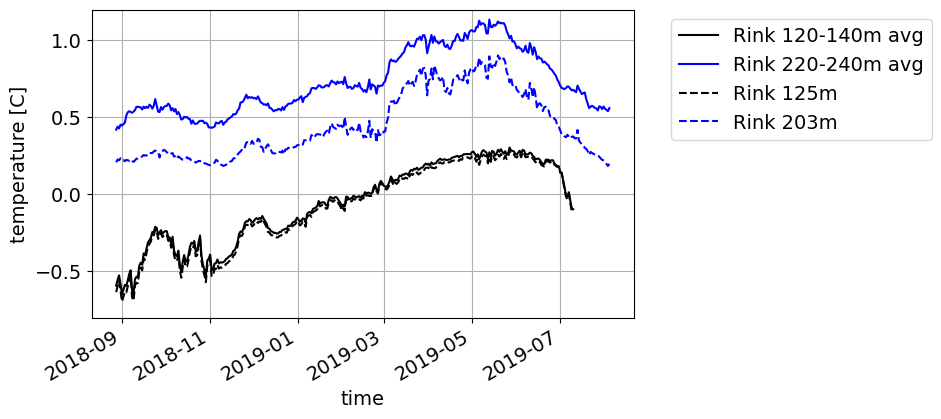

In [26]:
# RINK TEMP
plt.rcParams["figure.figsize"] = (7,4)
rink_temp_120m_timeseries_da.plot.line('k-', label='Rink 120-140m avg')
rink_temp_220m_timeseries_da.plot.line('b-', label='Rink 220-240m avg')
rink_ds.temperature.sel(Depth_temp=125).plot.line('k--', label='Rink 125m')
rink_ds.temperature.sel(Depth_temp=203).plot.line('b--', label='Rink 203m')

plt.ylim(-0.8,1.2)

plt.title("")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

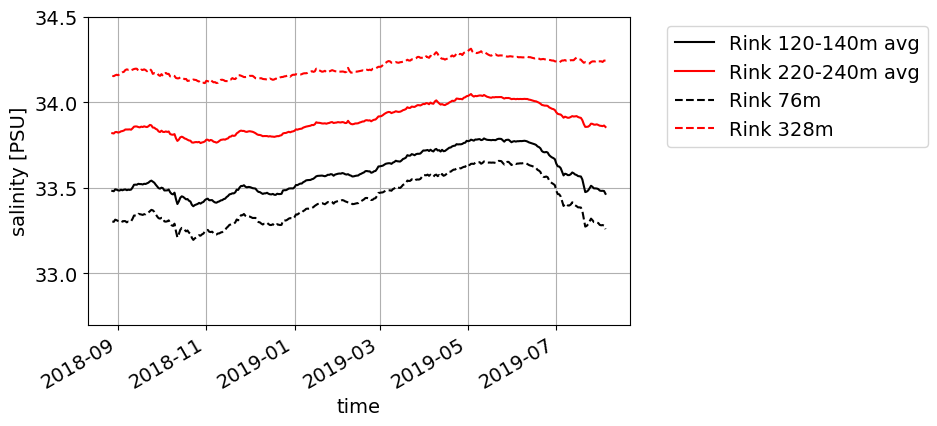

In [27]:
# RINK SALINITY
plt.rcParams["figure.figsize"] = (7,4)
rink_salt_120m_timeseries_da.plot.line('k-', label='Rink 120-140m avg')
rink_salt_220m_timeseries_da.plot.line('r-', label='Rink 220-240m avg')
rink_ds.salinity.sel(Depth_CTD=76).plot.line('k--', label='Rink 76m')
rink_ds.salinity.sel(Depth_CTD=328).plot.line('r--', label='Rink 328m')

plt.ylim(32.7,34.5)

plt.title("")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

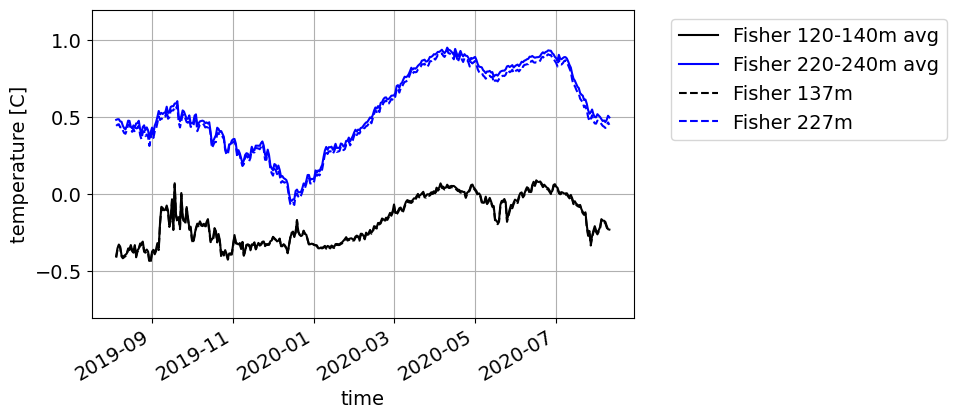

In [28]:
# FISHER TEMP
plt.rcParams["figure.figsize"] = (7,4)
fisher_temp_120m_timeseries_da.plot.line('k-', label='Fisher 120-140m avg')
fisher_temp_220m_timeseries_da.plot.line('b-', label='Fisher 220-240m avg')
fisher_ds.temperature.sel(Depth_temp=137).plot.line('k--', label='Fisher 137m')
fisher_ds.temperature.sel(Depth_temp=227).plot.line('b--', label='Fisher 227m')

plt.ylim(-0.8,1.2)

plt.title("")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

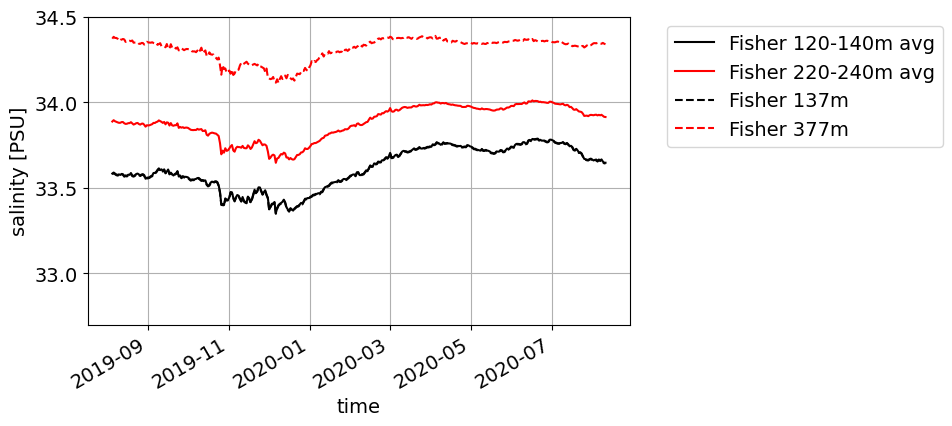

In [29]:
# FISHER SALINITY
plt.rcParams["figure.figsize"] = (7,4)
fisher_salt_120m_timeseries_da.plot.line('k-', label='Fisher 120-140m avg')
fisher_salt_220m_timeseries_da.plot.line('r-', label='Fisher 220-240m avg')
fisher_ds.salinity.sel(Depth_CTD=137).plot.line('k--', label='Fisher 137m')
fisher_ds.salinity.sel(Depth_CTD=377).plot.line('r--', label='Fisher 377m')

plt.ylim(32.7,34.5)

plt.title("")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

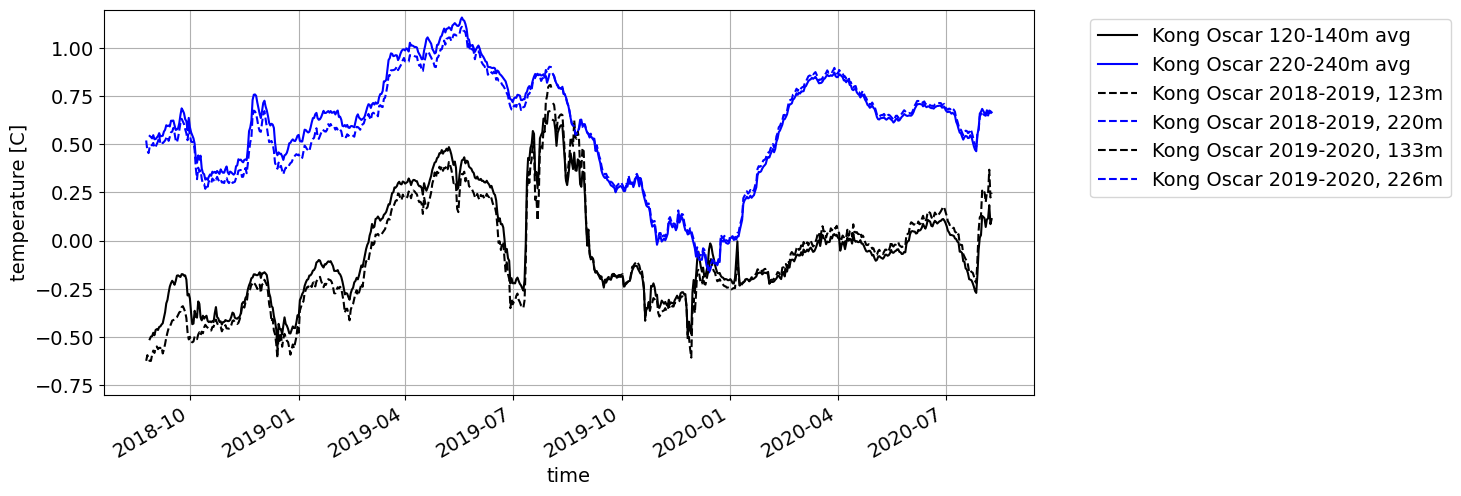

In [30]:
# KONG OSCAR TEMP
plt.rcParams["figure.figsize"] = (12,5)
KO_temp_120m_timeseries_da.plot.line('k-', label='Kong Oscar 120-140m avg')
KO_temp_220m_timeseries_da.plot.line('b-', label='Kong Oscar 220-240m avg')
kongoscar19_ds.temperature.sel(Depth_temp=123).plot.line('k--', label='Kong Oscar 2018-2019, 123m')
kongoscar19_ds.temperature.sel(Depth_temp=220).plot.line('b--', label='Kong Oscar 2018-2019, 220m')
kongoscar20_ds.temperature.sel(Depth_temp=133).plot.line('k--', label='Kong Oscar 2019-2020, 133m')
kongoscar20_ds.temperature.sel(Depth_temp=226).plot.line('b--', label='Kong Oscar 2019-2020, 226m')

plt.ylim(-0.8,1.2)

plt.title("")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

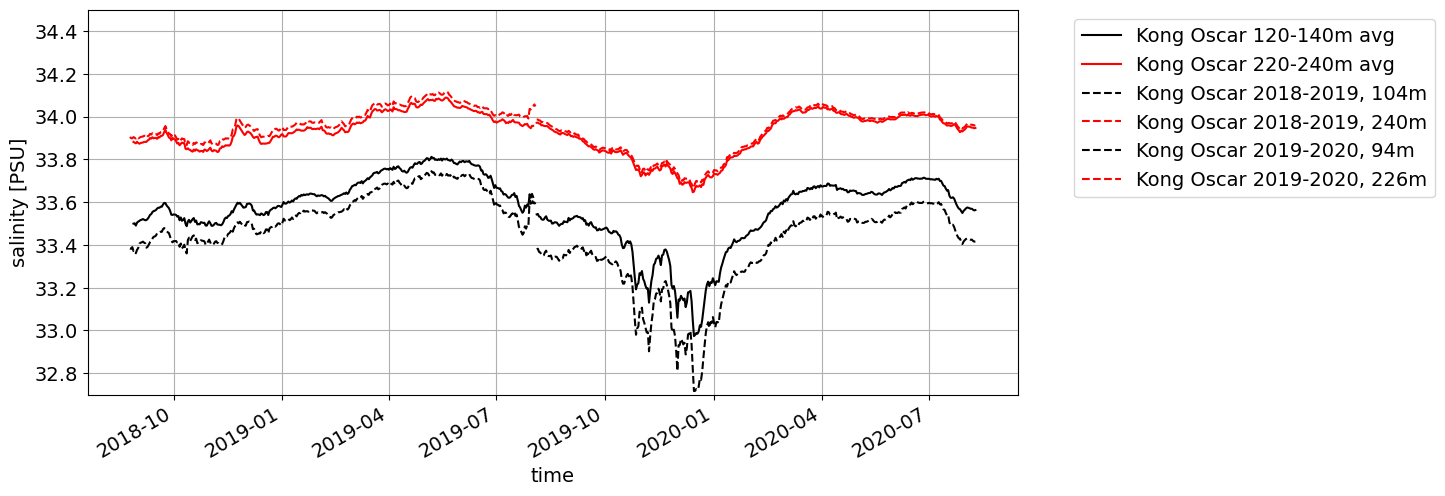

In [31]:
# KONG OSCAR SALINITY
plt.rcParams["figure.figsize"] = (12,5)
KO_salt_120m_timeseries_da.plot.line('k-', label='Kong Oscar 120-140m avg')
KO_salt_220m_timeseries_da.plot.line('r-', label='Kong Oscar 220-240m avg')
kongoscar19_ds.salinity.sel(Depth_CTD=104).plot.line('k--', label='Kong Oscar 2018-2019, 104m')
kongoscar19_ds.salinity.sel(Depth_CTD=240).plot.line('r--', label='Kong Oscar 2018-2019, 240m')
kongoscar20_ds.salinity.sel(Depth_CTD=94).plot.line('k--', label='Kong Oscar 2019-2020, 94m')
kongoscar20_ds.salinity.sel(Depth_CTD=226).plot.line('r--', label='Kong Oscar 2019-2020, 226m')

plt.ylim(32.7,34.5)

plt.title("")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

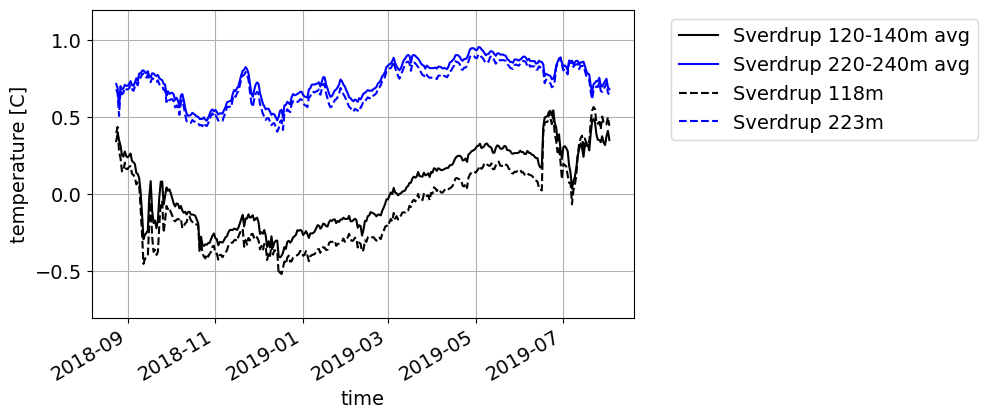

In [32]:
# SVERDRUP TEMP
plt.rcParams["figure.figsize"] = (7,4)
sverdrup_temp_120m_timeseries_da.plot.line('k-', label='Sverdrup 120-140m avg')
sverdrup_temp_220m_timeseries_da.plot.line('b-', label='Sverdrup 220-240m avg')
sverdrup_ds.temperature.sel(Depth_temp=118).plot.line('k--', label='Sverdrup 118m')
sverdrup_ds.temperature.sel(Depth_temp=223).plot.line('b--', label='Sverdrup 223m')

plt.ylim(-0.8,1.2)

plt.title("")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');

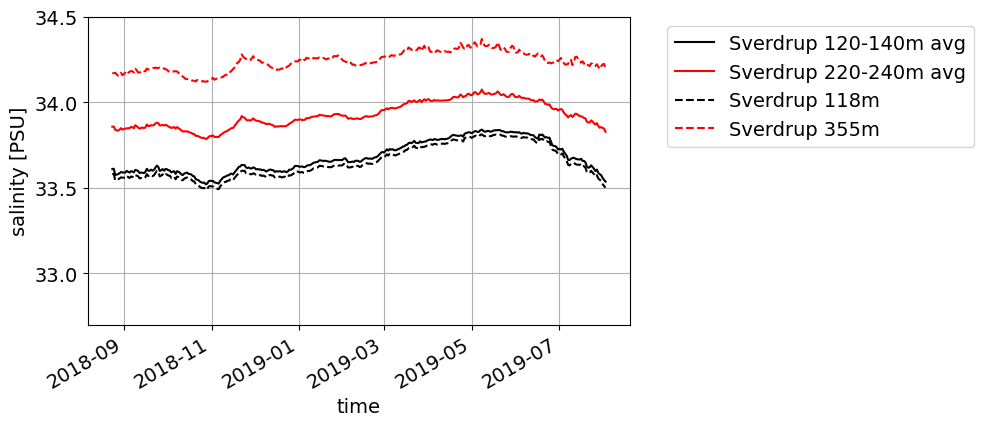

In [33]:
# SVERDRUP SALINITY
plt.rcParams["figure.figsize"] = (7,4)
sverdrup_salt_120m_timeseries_da.plot.line('k-', label='Sverdrup 120-140m avg')
sverdrup_salt_220m_timeseries_da.plot.line('r-', label='Sverdrup 220-240m avg')
sverdrup_ds.salinity.sel(Depth_CTD=118).plot.line('k--', label='Sverdrup 118m')
sverdrup_ds.salinity.sel(Depth_CTD=355).plot.line('r--', label='Sverdrup 355m')

plt.ylim(32.7,34.5)

plt.title("")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left');